<a href="https://colab.research.google.com/github/prateekk237/iTunesAndroid/blob/main/abcanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# what is ABC Analysis ?

ABC Analysis is a product segmentation technique used in Inventory Control

A : High value item and the service level is High
B : Moderate value items and the service level is Medium
C : Low value items and service level is Low


> Indented block


# How to do ABC Analysis?

Required minimum 1 year sales data of all the Product with Quantity sold and Revenue generated


In [ ]:
#import the packages required for the analysis
import pandas as pd # Pandas used for Data analysis, Data importing, exporting
import numpy as np  # NumPy is used for mathematical operatons 
import seaborn as sns  # Seaborn is used for Plot, Graphical Represet
!pip install inventorize3
import inventorize3 as inv  # import the inventorize3 for ABC Analysis

In [ ]:
raw_data = pd.read_csv("/content/final(1).csv")

In [ ]:
raw_data.head(5)

,date,store,item,sales,Price
0,2013-01-01,1.0,1.0,13.0,12.0
1,2013-01-02,1.0,1.0,11.0,12.0
2,2013-01-03,1.0,1.0,14.0,12.0
3,2013-01-04,1.0,1.0,13.0,12.0
4,2013-01-05,1.0,1.0,10.0,12.0


In [ ]:
#check how many columns
raw_data.shape

(188453, 5)

In [ ]:
#check the type of Data
raw_data.dtypes

date      object
store    float64
item     float64
sales    float64
Price    float64
dtype: object

In [ ]:
#check the data period Date using min & max
raw_data ['date']= pd.to_datetime (raw_data ['date'])
print(raw_data['date'].min(), raw_data['date'].max())

2013-01-01 00:00:00 2017-12-31 00:00:00


In [ ]:
# Clean the data 
data= raw_data.drop_duplicates ()
data= data.dropna()
data= data [data ['item' ]>0]

In [ ]:
raw_data.shape

(188453, 5)

In [ ]:
# Only Column we needed
data1 = data [['date','store', 'item', 'Price']]

In [ ]:
# Now calculate the Revenue
data1 ['Revenue'] = data1 ['item'] * data1 ['Price']

In [ ]:
data1.head()

,date,store,item,Price,Revenue
0,2013-01-01,1.0,1.0,12.0,12.0
1,2013-01-02,1.0,1.0,12.0,12.0
2,2013-01-03,1.0,1.0,12.0,12.0
3,2013-01-04,1.0,1.0,12.0,12.0
4,2013-01-05,1.0,1.0,12.0,12.0


In [ ]:
# Calculate Stock keeping Unit (SKU) = Quantity & Total Revenue  and add the Volume column

data2 = data1.groupby (['date', 'store']).agg (Volume = ('item',np.sum), Revenue = ('Revenue',np.sum)).reset_index()

In [ ]:
data2.head()

,date,store,Volume,Revenue
0,2013-01-01,1.0,66.0,3191.0
1,2013-01-01,2.0,66.0,3191.0
2,2013-01-01,3.0,66.0,3191.0
3,2013-01-01,4.0,66.0,3191.0
4,2013-01-01,5.0,55.0,2421.0


In [ ]:
# Lets Classify the Product to A B C 
data_abc = inv.ABC(data2 [['store', 'Volume']])

In [ ]:
# Lets check the classification of the product 

data_abc

,store,Volume,Percentage,comulative,Category
0,1.0,66.0,0.000062,0.000062,A
8931,2.0,66.0,0.000062,0.000124,A
8922,3.0,66.0,0.000062,0.000185,A
8921,2.0,66.0,0.000062,0.000247,A
8920,1.0,66.0,0.000062,0.000309,A
...,...,...,...,...,...
9164,5.0,55.0,0.000051,0.999794,C
9165,6.0,55.0,0.000051,0.999846,C
9166,7.0,55.0,0.000051,0.999897,C
9167,8.0,55.0,0.000051,0.999949,C


In [ ]:
# Lets count the Categories

data_abc.Category.value_counts()

A    14373
B     2915
C      972
Name: Category, dtype: int64

In [ ]:
data_summary = data_abc.groupby ('Category').agg (Count = ('Category',np.count_nonzero), Percentage = ('Percentage',np.sum)).reset_index()

In [ ]:
data_summary ['Percentage'] = data_summary['Percentage'] * 100

In [ ]:
data_summary

,Category,Count,Percentage
0,A,14373,79.995265
1,B,2915,15.002264
2,C,972,5.002470


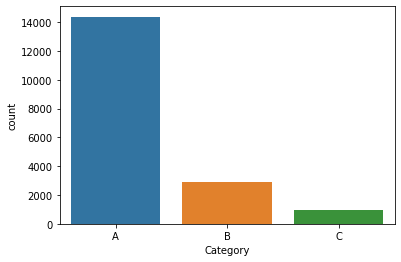

In [ ]:
# Lets Plot the Graph and Count the Category

sns.countplot (x= 'Category', data = data_abc, label = True)

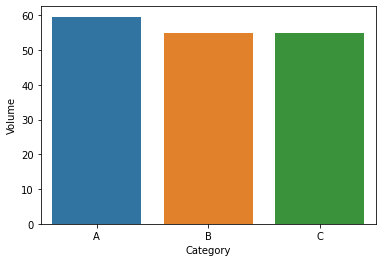

In [ ]:
# Lets plot the Graph for Volume Sales 
sns.barplot ( x='Category', y= 'Volume', data= data_abc)

In [ ]:
# Lets count the Category
data_abc1 =inv.ABC(data2 [['store', 'Revenue']])
data_abc.Category.value_counts()

A    14373
B     2915
C      972
Name: Category, dtype: int64